## Sukurkite klasifikatorių, FashionMNIST duomenų rinkiniui

- Įsikelkite duomenis, susipažinkite su jais
- Pamėginkite sukurti neuroninį tinklą paveikslėliui priskiriantį vieną iš 10 galimų klasių

In [26]:
#Įsikeliame reikalingas bibliotekas


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

import keras

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [27]:
#Įsikeliame duomenis

(X_train, y_train), (X_test, y_test) =  keras.datasets.fashion_mnist.load_data()

In [28]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [29]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, shuffle= True)

In [31]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_valid_one_hot = keras.utils.to_categorical(y_valid, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [33]:
batch_size = 32
h = model.fit(X_train, y_train_one_hot, validation_data=(X_valid, y_valid_one_hot), epochs = 30, batch_size = batch_size)

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7603 - accuracy: 0.7521 - val_loss: 0.5302 - val_accuracy: 0.8232
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5038 - accuracy: 0.8253 - val_loss: 0.4548 - val_accuracy: 0.8422
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4565 - accuracy: 0.8407 - val_loss: 0.4257 - val_accuracy: 0.8498
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4274 - accuracy: 0.8514 - val_loss: 0.4018 - val_accuracy: 0.8605
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4066 - accuracy: 0.8585 - val_loss: 0.3985 - val_accuracy: 0.8648
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3892 - accuracy: 0.8638 - val_loss: 0.3934 - val_accuracy: 0.8578
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3764 - accuracy: 0.8675 - val_loss: 0.3723 - val_accuracy:

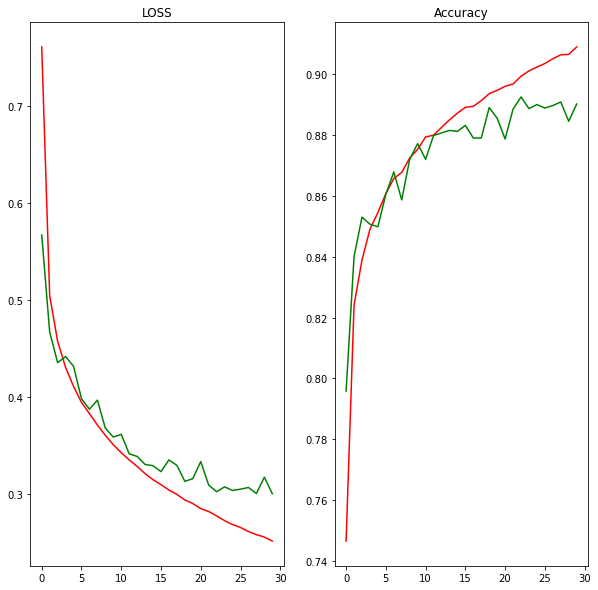

In [24]:
# atvaizduojame grafiskai
plt.subplot(1, 2, 1)
plt.title('LOSS')
plt.plot(h.history['loss'], color='red')
plt.plot(h.history['val_loss'], color='green')
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(h.history['accuracy'], color='red')
plt.plot(h.history['val_accuracy'], color='green')

In [25]:
print(X_test.shape, y_test_one_hot.shape)

(10000, 28, 28) (10000, 10)


In [26]:
model.evaluate(X_test, y_test_one_hot)

10000/10000 [==============================] - 1s 61us/step


[0.3462859517991543, 0.8751999735832214]

- 2 HL 128/64 neronai / batch 100 / 50 epoch / opt sgd lr 0.01: loss: 0.3669 - accuracy: 0.8731
- 1 HL 128 / batch 100 / 50 epoch / opt sgd lr 0.01: loss: 0.3955 - accuracy: 0.8579
- 1 HL 128 / batch 1000 / 50 epoch / opt sgd lr 0.01: loss: 0.5247 - accuracy: 0.8197
- 1 HL 128 / batch 1000 / 200 epoch / opt sgd lr 0.01: loss: loss: 0.4327 - accuracy: 0.8456
- 1 HL 128 / batch 1000 / 200 epoch / opt adam lr 0.01: loss: 1.0445 - accuracy: 0.8699
- 2 HL 128/128 / batch 1000 / 200 epoch / opt adam lr 0.01: loss: 1.1647 - accuracy: 0.8810
- 2 HL 128/128 / batch 1000 / 200 epoch / opt sgd lr 0.01: loss: 0.4064 - accuracy: 0.8564
- 2 HL 128/128 / 200 epoch / opt sgd lr 0.01: loss: 0.5976 - accuracy: 0.8834 (ilgai mokė)
- 3 HL 128/128/128 / batch 1000 / 100 epoch / opt sgd lr 0.01: loss: 0.4268 - accuracy: 0.8468
- 2 HL 128/128 / batch 32 / 30 epoch / opt adam: loss: 0.4311 - accuracy: 0.8859
- 2 HL 128/128 / batch 32 / 30 epoch / opt sgd: loss: 0.3419 - accuracy: 0.8797

### Pastebėjimai
- Didesnis batch size, žymiai pagreitina mokymąsi, bet šiek tiek sumažina tikslumą
- Sudėtingesnis modelis nebūtinai priveda prie geresnių rezultatų. pvz. pridėjus 3 hidden layer'ius po 200-300 neuronų, nedavė žymiai geresnių rezultatų nei su 1 hidden layer'iu ir 128 neuronais
- epochų skaičius taip pat turi įtakos iki tam tikro skaičiaus
- su adam optimizatoriumi modelis mažiau stabilus, bet gaunamas didesnis modelio tikslumas su train duomenimis

In [34]:
# spejame
predictions = model.predict(X_test)

### Confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
# suskaiciuojeme cf matrix
cf_matrix = confusion_matrix(y_test_one_hot.argmax(axis=1), predictions.argmax(axis=1))
# konvertuojame i dataframe
df_cm = pd.DataFrame(cf_matrix, index=range(10), columns=range(10))
print(df_cm)
# plot'inam
plt.figure(figsize = (15,15))
sn.heatmap(df_cm, annot=True)